In [1]:
library(ggplot2)
library(dplyr)
require(maps)
require(viridis)
theme_set(
  theme_void()
  )


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: maps
Loading required package: viridis
Loading required package: viridisLite
Warning message:
“New theme missing the following elements: axis.title.x, axis.title.x.top, axis.title.y, axis.title.y.right, axis.text.x, axis.text.x.top, axis.text.y, axis.text.y.right, axis.ticks, axis.line, axis.line.x, axis.line.y, legend.background, legend.margin, legend.spacing, legend.spacing.x, legend.spacing.y, legend.key, legend.key.height, legend.key.width, legend.text.align, legend.title.align, legend.direction, legend.justification, legend.box.margin, legend.box.background, legend.box.spacing, panel.background, panel.border, panel.spacing.x, panel.spacing.y, panel.grid, panel.grid.minor, plot.background, strip.background, strip.placement, strip.text.x, strip.text.y”

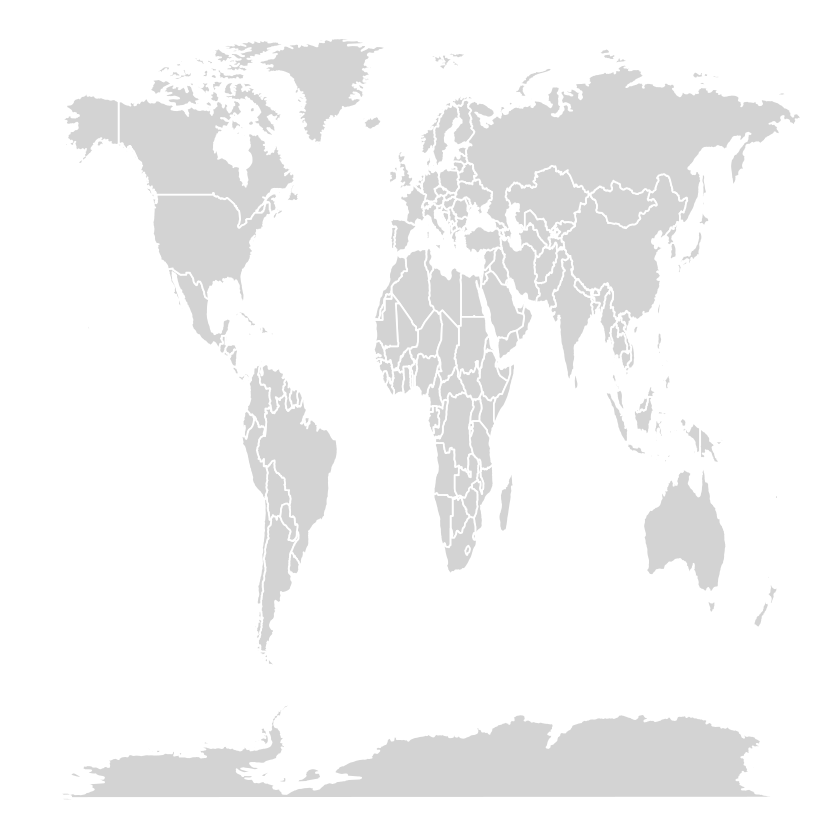

In [2]:
world_map <- map_data("world")
ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white")

In [8]:
# Some EU Contries
some.eu.countries <- c(
  "Uruguay"
)
# Retrievethe map data
some.eu.maps <- map_data("world", region = some.eu.countries)

# Compute the centroid as the mean longitude and lattitude
# Used as label coordinate for country's names
region.lab.data <- some.eu.maps %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat))

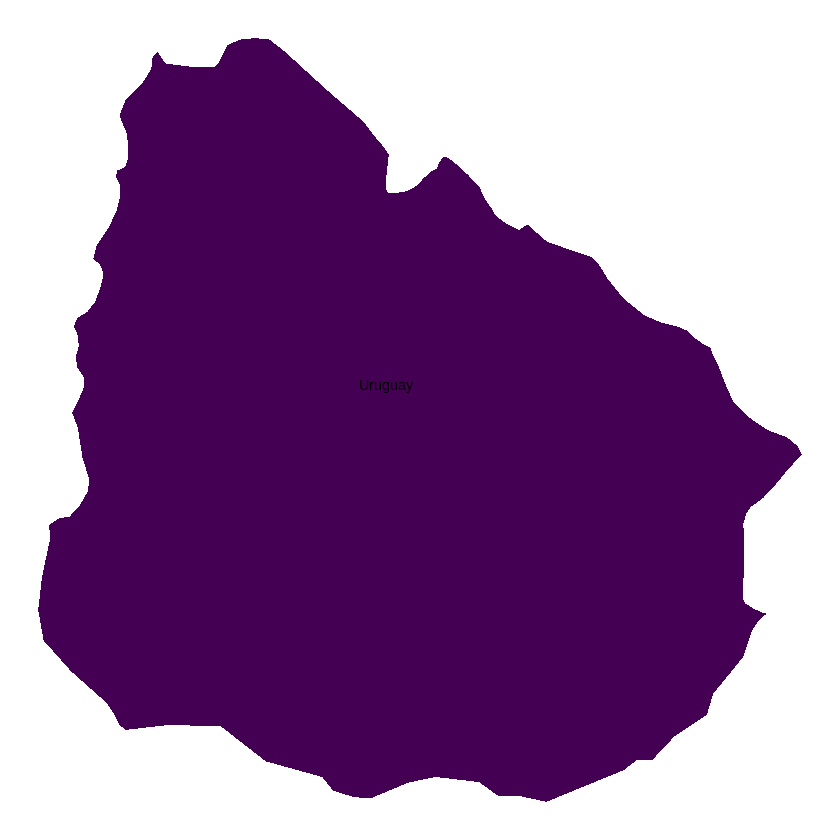

In [9]:
ggplot(some.eu.maps, aes(x = long, y = lat)) +
  geom_polygon(aes( group = group, fill = region))+
  geom_text(aes(label = region), data = region.lab.data,  size = 3, hjust = 0.5)+
  scale_fill_viridis_d()+
  theme_void()+
  theme(legend.position = "none")

In [11]:
install.packages("geojsonio")

also installing the dependencies ‘e1071’, ‘classInt’, ‘units’, ‘protolite’, ‘sf’, ‘rgdal’, ‘rgeos’, ‘V8’, ‘geojson’, ‘jqr’



In [19]:
# library
library(tidyverse)
 
# Hexbin available in the geojson format here: https://team.carto.com/u/andrew/tables/andrew.us_states_hexgrid/public/map. Download it and then:
library(geojsonio)
spdf <- geojson_read("barrios.geojson",  what = "sp")
 
# I need to 'fortify' the data to be able to show it with ggplot2 (we need a data frame format)
library(broom)
spdf@data = spdf@data %>% mutate(google_name = gsub(" \\(Uruguay\\)", "", google_name))
spdf_fortified <- tidy(spdf, region = "google_name")

ERROR: Error in library(geojsonio): there is no package called ‘geojsonio’


In [ ]:
# I need to fortify the data AND keep trace of the commune code! (Takes 2 minutes)
library(broom)
spdf_fortified <- tidy(spdf, region = "code")

# Now I can plot this shape easily as described before:
ggplot() +
  geom_polygon(data = spdf_fortified, aes( x = long, y = lat, group = group)) +
  theme_void() +
  coord_map()

# Geospatial data available in the geojson format!
library(geojsonio)
spdf <- geojson_read("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson",  what = "sp")
 
# Since it is a bit to much data, I select only a subset of it:
spdf = spdf[ substr(spdf@data$code,1,2)  %in% c("06", "83", "13", "30", "34", "11", "66") , ]
 
# I need to fortify the data AND keep trace of the commune code! (Takes 2 minutes)
library(broom)
spdf_fortified <- tidy(spdf, region = "code")
 
# Now I can plot this shape easily as described before:
ggplot() +
  geom_polygon(data = spdf_fortified, aes( x = long, y = lat, group = group)) +
  theme_void() +
  coord_map()